In [25]:
#import libraries
import pandas as pd
import scipy.stats as stats
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import string


In [26]:
# Load in pre-modified RTqPCR data

In [27]:
BioRad_plate_map_fp = './raw_BioRad.csv'

if not os.path.isfile(BioRad_plate_map_fp):
    print("Problem! %s is not a path to a valid file")

In [28]:
BioRad_plate_df = pd.read_csv(BioRad_plate_map_fp)

In [29]:
BioRad_plate_df.head()

,Well,Fluor,Target,Content,Sample,Biological Set Name,BioRad Cq,Cq Mean,Cq Std. Dev,Starting Quantity (SQ),Log Starting Quantity,SQ Mean,SQ Std. Dev,Set Point,Well Note
0,A01,Cy5,NaN,Unkn,NaN,NaN,NaN,0.000000,0,NaN,NaN,0.0,0,55,NaN
1,A01,FAM,NaN,Unkn,NaN,NaN,31.068233,31.068233,0,NaN,NaN,NaN,0,55,NaN
2,A01,HEX,NaN,Unkn,NaN,NaN,30.651172,30.651172,0,NaN,NaN,NaN,0,55,NaN
3,A01,Texas Red,NaN,Unkn,NaN,NaN,NaN,0.000000,0,NaN,NaN,0.0,0,55,NaN
4,A02,Cy5,NaN,Unkn,NaN,NaN,NaN,0.000000,0,NaN,NaN,0.0,0,55,NaN


In [40]:
print(ord('A'))
print()
BioRad_plate_df.where(BioRad_plate_df['Fluor'] == 'FAM', axis=0)

65


,Well,Fluor,Target,Content,Sample,Biological Set Name,BioRad Cq,Cq Mean,Cq Std. Dev,Starting Quantity (SQ),Log Starting Quantity,SQ Mean,SQ Std. Dev,Set Point,Well Note
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A01,FAM,NaN,Unkn,NaN,NaN,31.068233,31.068233,0.0,NaN,NaN,NaN,0.0,55.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1533,P24,FAM,NaN,Unkn,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,0.0,0.0,55.0,NaN
1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
def plot_plate_vals(dataset, color_map='YlGnBu', annot_str=None,
                    annot_fmt='.5s'):
    """
    Plots values in a plate format. Returns a heatmap in the shape of the
    plate, with bar graphs aligned to the rows and columns showing the mean and
    spread of each row and column, and a histogram showing the distribution of
    values.
    Optionally can plot an array of names or other annotations on top of the
    heatmap.
    Parameters
    ----------
    dataset: 2D array of numeric
        data to plot
    color_map: str
        matplotlib color map name for heatmap
    annot_str: 2D array of str
        values to write over heatmap values to annotate wells
    annot_fmt: str
        string formatting values for annotations. Defaults to first 5 char per
        well.
    Returns
    -------
    """
    plt.figure(figsize=(20, 20))

    with sns.axes_style("white"):
        ax1 = plt.subplot2grid((40, 20), (20, 0), colspan=18, rowspan=18)
        ax1.xaxis.tick_top()
        if annot_str is None:
            sns.heatmap(dataset,
                        ax=ax1,
                        xticklabels=[x + 1 for x in range(dataset.shape[1])],
                        yticklabels=list(string.ascii_uppercase)[
                            0:dataset.shape[0]],
                        # square = True,
                        annot=True,
                        fmt='.0f',
                        cmap=color_map,
                        cbar=False)
        else:
            sns.heatmap(dataset,
                        ax=ax1,
                        xticklabels=[x + 1 for x in range(dataset.shape[1])],
                        yticklabels=list(string.ascii_uppercase)[
                            0:dataset.shape[0]],
                        # square = True,
                        annot=annot_str,
                        fmt=annot_fmt,
                        cmap=color_map,
                        cbar=False)

    with sns.axes_style("white"):
        ax2 = plt.subplot2grid((40, 20), (38, 0), colspan=18, rowspan=2)
        ax3 = plt.subplot2grid((40, 20), (20, 18), colspan=2, rowspan=18)
        sns.despine()
        sns.barplot(data=dataset, orient='v', ax=ax2, color='grey')
        sns.barplot(data=dataset.transpose(), orient='h', ax=ax3,
                    color='grey')
        ax2.set(xticklabels=[], yticklabels=[])
        ax3.set(xticklabels=[], yticklabels=[])

    with sns.axes_style():
        ax4 = plt.subplot2grid((40, 20), (0, 0), colspan=18, rowspan=18)
        sns.distplot(dataset.flatten()[~np.isnan(dataset.flatten())], ax=ax4,
                     bins=20)

    return

In [31]:
def make_2D_array(qpcr, data_col='Cp', well_col='Pos', rows=16, cols=24):
    """
    Pulls a column of data out of a dataframe and puts into array format
    based on well IDs in another column
    Parameters
    ----------
    qpcr: Pandas DataFrame
        dataframe from which to pull values
    data_col: str
        name of column with data
    well_col: str
        name of column with well IDs, in 'A1,B12' format
    rows: int
        number of rows in array to return
    cols: int
        number of cols in array to return
    Returns
    -------
    """
    # initialize empty Cp array
    cp_array = np.empty((rows, cols), dtype=object)

    # fill Cp array with the post-cleaned values from the right half of the
    # plate
    for record in qpcr.iterrows():
        row = ord(str.upper(record[1][well_col][0])) - ord('A')
        col = int(record[1][well_col][1:]) - 1
        cp_array[row, col] = record[1][data_col]

    return(cp_array)

In [32]:
well_col = 'Well'

In [34]:
# get DNA concentratin information
qpcr = make_2D_array(BioRad_plate_df, data_col='Cq Mean', well_col=well_col).astype(float)

qpcr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 

/Users/htubb/miniconda3/envs/pooling_nb/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/htubb/miniconda3/envs/pooling_nb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


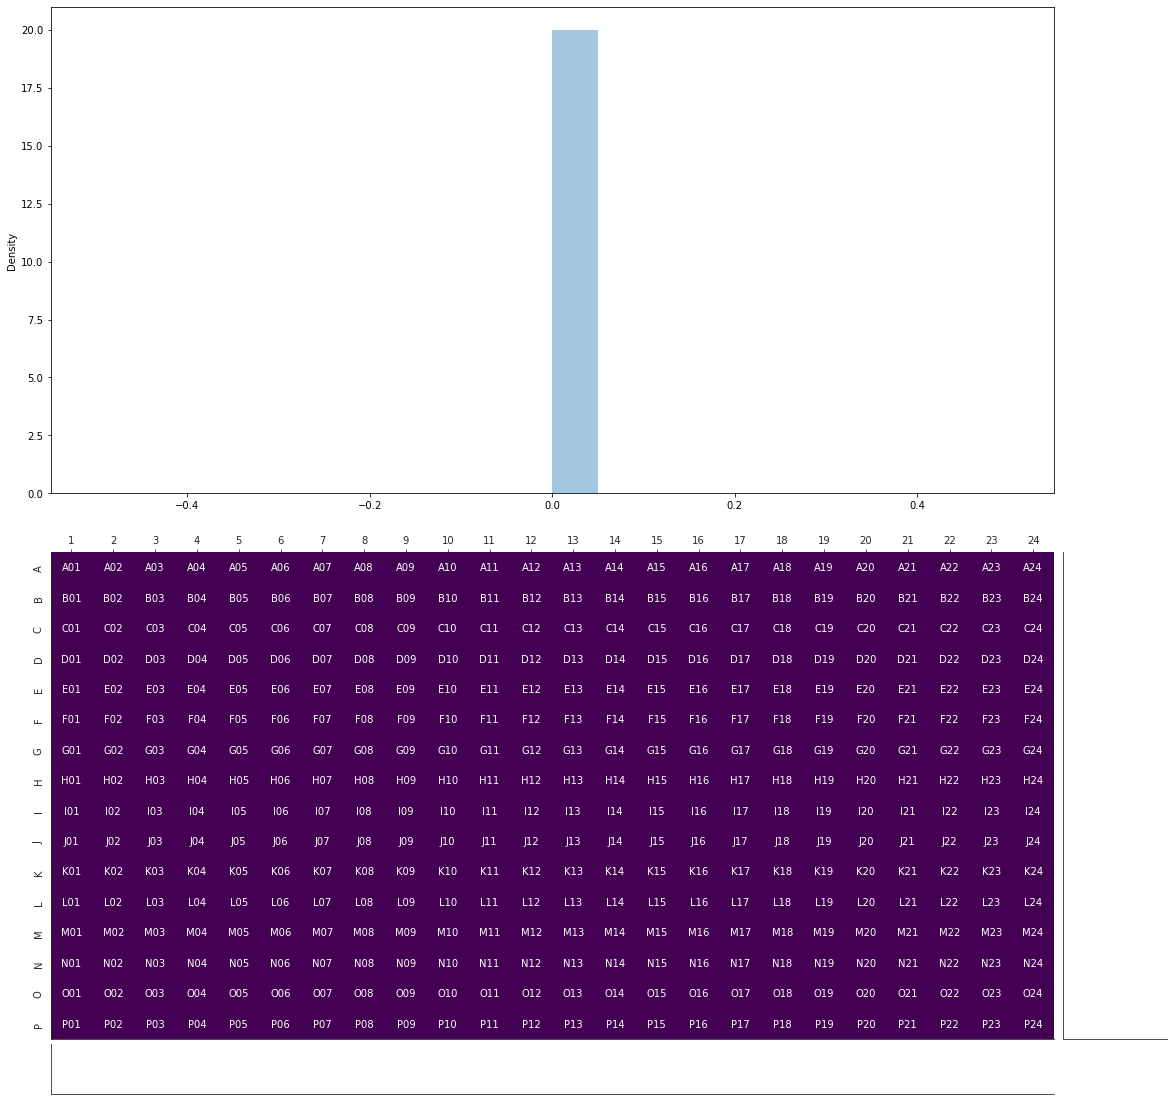

In [35]:
# get information for annotation
names = make_2D_array(BioRad_plate_df, data_col='Well', well_col=well_col)


plot_plate_vals(qpcr,
                annot_str=names,
                color_map='viridis',
                annot_fmt='.5s')

In [ ]:
# get DNA concentratin information
dna_concs = make_2D_array(plate_df, data_col='Sample DNA Concentration', well_col=Well).astype(float)

In [ ]:
# get information for annotation
names = make_2D_array(plate_df, data_col='Sample', well_col=well_col)

clip = np.clip(dna_concs, 0, 30)
plot_plate_vals(clip,
                annot_str=names,
                color_map='viridis',
                annot_fmt='.5s')

In [ ]:
Thermo_plate_map_fp = './raw_Thermo.csv'

In [ ]:
if not os.path.isfile(Thermo_plate_map_fp):
    print("Problem! %s is not a path to a valid file")

In [ ]:
Thermo_plate_df = pd.read_csv(plate_map_fp)

In [ ]:
Thermo_plate_df.head()

# Old Notebook

In [ ]:
plate_map_fp = './QS7_WW_qPCR_20220802_144252_Results_20220802 160258_.csv'

if not os.path.isfile(plate_map_fp):
    print("Problem! %s is not a path to a valid file")

In [ ]:
plate_df = pd.read_csv(plate_map_fp)

In [ ]:
plate_df.head()

In [ ]:
plate_df_updated = plate_df.drop('Unnamed: 15',axis=1)
plate_df_updated = plate_df_updated.drop('Unnamed: 16',axis=1)
plate_df_updated = plate_df_updated.drop('Task',axis=1)
plate_df_updated = plate_df_updated.drop('Quencher',axis=1)
plate_df_updated = plate_df_updated.drop('Omit',axis=1)
plate_df_updated = plate_df_updated.drop('Well',axis=1)
plate_df_updated = plate_df_updated.drop('Cq SD',axis=1)
plate_df_updated

In [ ]:
plate_df_updated['Error'] = plate_df_updated['BioRad Cq'] - plate_df_updated['Thermo Cq']
plate_df_updated

In [ ]:
print("mean error: ", plate_df_updated['Error'].mean())

In [ ]:
print("median error: ", plate_df_updated['Error'].median())

# Check that residuals are normally distributed

In [ ]:
plate_df_updated['Error'].hist()

BioRad = plate_df_updated['BioRad Cq']
Thermo = plate_df_updated['Thermo Cq']

In [ ]:
print("BioRad Mean Cq:" , BioRad.mean(),
      ", Thermo Mean Cq: ", Thermo.mean())

In [ ]:
print("BioRad Cq st_dev: ", np.std(BioRad),
      ", Thermo Cq st_dev: ", np.std(Thermo))

In [ ]:
data = {
    'BioRad': BioRad,
    'Thermo': Thermo
}

In [ ]:
barchart_df = pd.DataFrame(data)

ax = sns.boxplot(data = barchart_df)
ax = sns.swarmplot(data = barchart_df, edgecolor="black", linewidth=0.9)
ax.set(xlabel='Instrument', ylabel='Cq', title='Cq Distribution')

plt.hist(data['BioRad'], alpha=0.5, label='BioRad')
plt.hist(data['Thermo'], alpha=0.5, label='Thermo')
plt.legend(loc='upper right')
plt.xlabel('Cq')
plt.ylabel('Frequency')
plt.title('Cq Distribution')

In [ ]:
bad = ~np.logical_or(np.isnan(barchart_df['BioRad']), np.isnan(barchart_df['Thermo']))
masked_nan_df = barchart_df[bad]
masked_nan_df

In [ ]:
r, p = stats.pearsonr(masked_nan_df['BioRad'], masked_nan_df['Thermo'])

slope, intercept, r_value, p_value, std_err = stats.linregress(masked_nan_df['BioRad'],masked_nan_df['Thermo'])

print(r_value,p_value)

In [ ]:
corr_plot = sns.jointplot(BioRad, Thermo, kind='reg')
string_title = "r= " + str(round(r, 3)) + ", p= " + str(p)

ax = plt.gca()
ax.legend({"y={0:.3f}x{1:.3f}".format(slope,intercept)})

corr_plot.fig.suptitle(string_title, fontsize=10, y=0)

In [ ]:
barchart_df.describe()

In [ ]:
stats.shapiro(masked_nan_df['BioRad'])

In [ ]:
stats.shapiro(masked_nan_df['Thermo'])

In [ ]:
stats.ttest_rel(masked_nan_df['BioRad'], masked_nan_df['Thermo'])

In [ ]:
BioRadStd = np.std(BioRad)
print(BioRadStd)

In [ ]:
variance_data = {
    'BioRad Variance': (BioRad - (np.std(BioRad))^2),
    'Thermo Variance': (Thermo - (np.std(Thermo))^2)
}

In [ ]:
plt.hist(variance_data['BioRad Variance'], alpha=0.5, label='BioRad')
plt.hist(variance_data['Thermo Variance'], alpha=0.5, label='Thermo')
plt.legend(loc='upper right')
plt.title(label="Distribution of Variances")

# Proceed with ANOVA!